Dataset shape: (503, 8)
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

📊 Model Evaluation Metrics:
Mea

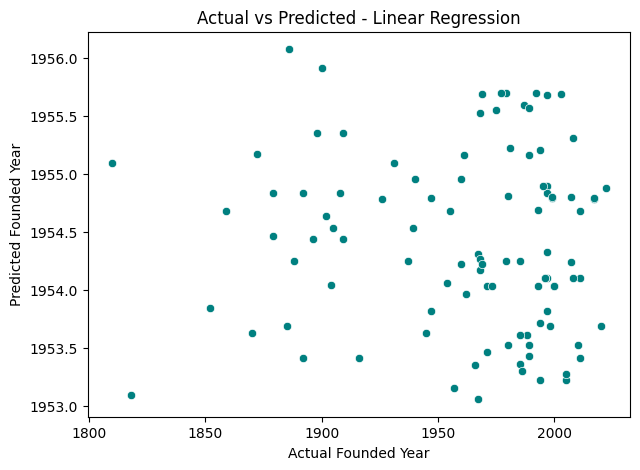

In [ ]:
#PAYAL CHATTERJEE
#22BDS0226

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Data preprocessing
df = df[['GICS Sector', 'GICS Sub-Industry', 'Founded']].dropna()

# 🔹 Clean 'Founded' column to extract numeric year only
# Example: "1928 (2011)" → 1928
df['Founded'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Remove any rows that still have NaN after cleaning
df = df.dropna(subset=['Founded'])

# 🔹 Encode categorical columns
le_sector = LabelEncoder()
le_sub = LabelEncoder()

df['Sector_encoded'] = le_sector.fit_transform(df['GICS Sector'])
df['SubIndustry_encoded'] = le_sub.fit_transform(df['GICS Sub-Industry'])

# Step 4: Define features (X) and target (y)
X = df[['Sector_encoded', 'SubIndustry_encoded']]
y = df['Founded']

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")

# Step 9: Visualization — Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Founded Year")
plt.ylabel("Predicted Founded Year")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


Dataset Loaded Successfully!

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

Dataset Information:
<cla

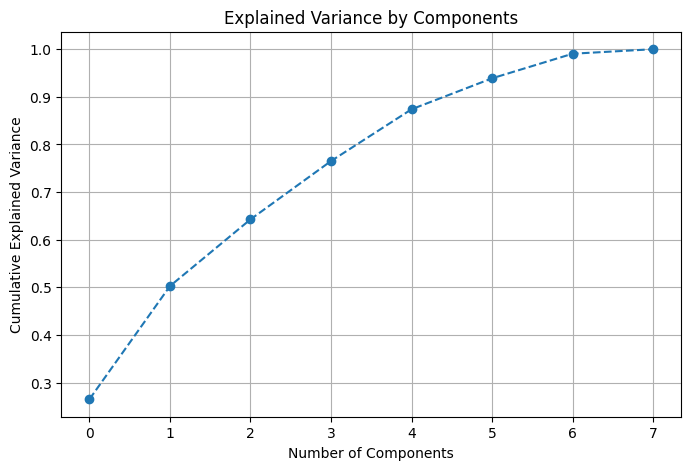

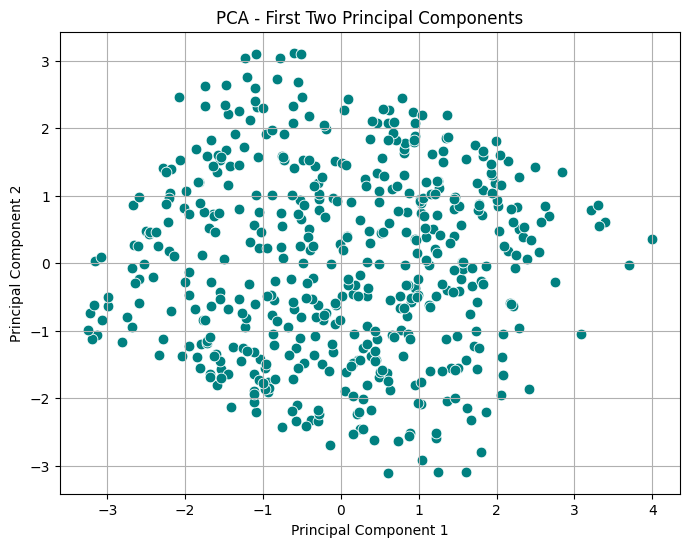


 PCA Performance Metrics:
R² Score  : 1.0000
MSE       : 0.0000
MAE       : 0.0000
RMSE      : 0.0000


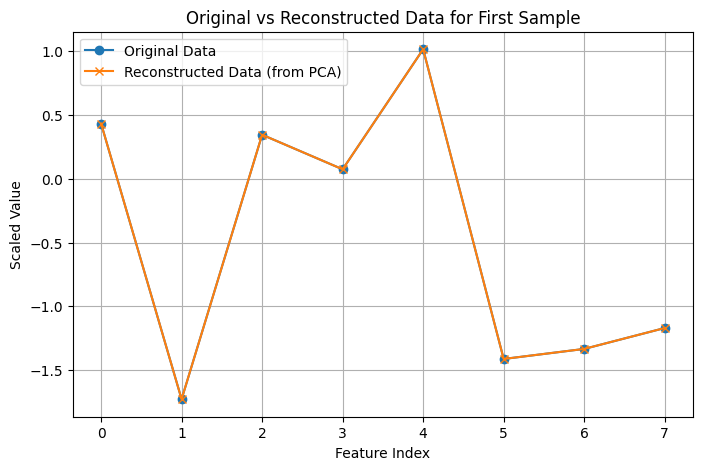

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)
print("Dataset Loaded Successfully!\n")
print(df.head())

# Step 3: Check Columns and Info
print("\nDataset Information:")
print(df.info())

# Step 4: Handle Missing Values
df = df.dropna()

# Step 5: Encode Categorical Columns
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

print("\nEncoded Dataset Sample:")
print(df.head())

# Step 6: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 7: Apply PCA
pca = PCA(n_components=None)   # Keep all components first
pca_data = pca.fit_transform(scaled_data)

# Step 8: Explained Variance Visualization
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 9: Choose top 2 Components for Visualization
pca_2 = PCA(n_components=2)
pca_2_data = pca_2.fit_transform(scaled_data)

# Step 10: 2D PCA Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2_data[:,0], y=pca_2_data[:,1], s=60, color='teal')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 11: Reconstruct Data from PCA
reconstructed_data = pca.inverse_transform(pca_data)

# Step 12: Calculate Error Metrics between Original and Reconstructed Data
r2 = r2_score(scaled_data, reconstructed_data)
mse = mean_squared_error(scaled_data, reconstructed_data)
mae = mean_absolute_error(scaled_data, reconstructed_data)
rmse = np.sqrt(mse)

# Step 13: Print Results
print("\n PCA Performance Metrics:")
print(f"R² Score  : {r2:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"RMSE      : {rmse:.4f}")

# Step 14: Plot Original vs Reconstructed for Sample Feature
plt.figure(figsize=(8,5))
plt.plot(scaled_data[0], label='Original Data', marker='o')
plt.plot(reconstructed_data[0], label='Reconstructed Data (from PCA)', marker='x')
plt.title('Original vs Reconstructed Data for First Sample')
plt.xlabel('Feature Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()
